### Práctica: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia. Simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](./assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

#### Paso 2: Obtención de la Función de Transferencia.

Realizaremos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero. Las impedancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$. 

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollando el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituyendo el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$


Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**. Un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.


##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

#### Paso 3.a) Crear la Función de Transferencia.

In [1]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Parámetros del circuito para una respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L = 4      # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [R2]
den = [L*C*R1, (L + R1*R2*C), (R1 + R2)]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
sistema_subamortiguado = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia es:")
print(sistema_subamortiguado)

La Función de Transferencia es:
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4


#### Paso 3.c) Graficar la respuesta del sistema.


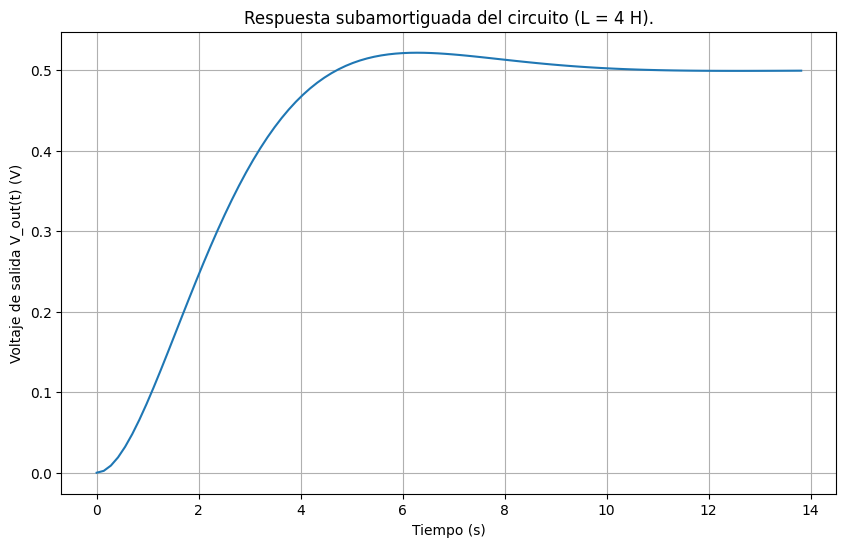

In [2]:
# --- Simulación de la respuesta al escalón unitario. ---
# Calculamos la respuesta del sistema a una entrada de 1 V.
# t es el vector de tiempo y vout_subamortiguado es el vector de la salida V_out(t).
t, vout_subamortiguado = ct.step_response(sistema_subamortiguado)

# --- Graficación de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t, vout_subamortiguado)
plt.title('Respuesta subamortiguada del circuito (L = 4 H).')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Ejercicio propuesto. Análisis de las respuestas críticamente amortiguada y sobreamortiguada.

Ahora que hemos analizado y simulado el caso subamortiguado, tu tarea es encontrar los valores de $L$ que producen las respuestas críticamente amortiguada y sobreamortiguada.

**Instrucciones:**

1.  **Respuesta Críticamente Amortiguada:**
    Recuerde que la ecuación característica del sistema es:
    $$ \Delta = s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
    
    Manteniendo $R_1 = 2 \, \Omega$, $R_2 = 2 \, \Omega$ y $C = 1 \, F$, determina analíticamente 
    el valor de $L$ que hace que el discriminante del polinomio característico ($b^2-4ac$) sea igual a cero. 
    $$ \implies (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

    Esto resultará en dos polos negativos, reales e iguales.
    * Muestra tu cálculo en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.
    
2.  **Respuesta Sobreamortiguada:**
    * Elige un valor de $L$ adecuado (valor propuesto con base en el análisis del valor para el caso críticamente amortiguado y el que se propuso al inicio para el caso subamortiguado).
    * Demuestra analíticamente que, con este nuevo valor de $L$, las raíces son dos números reales, distintos y negativos. Incluye este análisis en una celda de Markdown.
    * En una celda de código, utiliza ese valor de $L$ para crear la nueva función de transferencia; obtener y visualizar el mapa de polos y ceros; y generar la gráfica de su respuesta al escalón.

3.  **Gráfica comparativa:**
    * En una celda final, crea un único script que grafique las tres respuestas (subamortiguada, críticamente amortiguada y sobreamortiguada) en la misma figura.
    * Usa `plt.legend()` para identificar claramente cada curva. Esto te permitirá visualizar directamente cómo el cambio en un solo elemento afecta la dinámica del sistema.

## Solución: Respuestas de un circuito eléctrico de segundo orden.

**Objetivo:** Modelar un circuito eléctrico de segundo orden mediante el análisis de mallas para obtener su función de transferencia y simular la respuesta del sistema ante una entrada escalón, analizando y comparando los casos de respuesta subamortiguada, críticamente amortiguada y sobreamortiguada a través de la modificación de los parámetros del circuito y la ubicación de los polos del sistema.

#### Paso 1: Planteamiento del sistema.

Para nuestro análisis, utilizaremos un circuito RLC de dos mallas. La entrada será el voltaje de la fuente, $V_{in}(t)$, y la salida será el voltaje en la resistencia $R_2$, que denotaremos como $V_{out}(t)$.

![Diagrama del circuito eléctrico.](./assets/images/P_2_02_Diagrama.png)

*Figura 1. Diagrama eléctrico del circuito.*

#### Paso 2: Obtención de la Función de Transferencia.

Realizamos el análisis de mallas directamente en el dominio de Laplace, asumiendo condiciones iniciales iguales a cero, las impendancias de los componentes son $R_1$, $R_2$, $sL$ y $\frac{1}{sC}$.

Aplicamos la Ley de Voltajes de Kirchhoff (LVK) a cada malla:

**Ecuación de la Malla 1:**
$$ V_{in}(s) = (R_1 + \frac{1}{sC})I_1(s) - \frac{1}{sC}I_2(s) \quad \dots (1) $$

**Ecuación de la Malla 2:**
$$ 0 = -\frac{1}{sC}I_1(s) + (R_2 + sL + \frac{1}{sC})I_2(s) \quad \dots (2) $$

La salida del sistema es $V_{out}(s) = R_2 I_2(s)$. 
Nuestro objetivo es encontrar la función de transferencia $G(s) = \frac{V_{out}(s)}{V_{in}(s)}$.

Para ello, necesitamos resolver el sistema de ecuaciones para $I_2(s)$. Utilizando la regla de Cramer, obtenemos:
$$ I_2(s) = \frac{\begin{vmatrix} R_1 + \frac{1}{sC} & V_{in}(s) \\ -\frac{1}{sC} & 0 \end{vmatrix}}{\begin{vmatrix} R_1 + \frac{1}{sC} & -\frac{1}{sC} \\ -\frac{1}{sC} & R_2 + sL + \frac{1}{sC} \end{vmatrix}} = \frac{\frac{1}{sC}V_{in}(s)}{(R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2} $$

Desarrollamos el denominador:
$$ (R_1 + \frac{1}{sC})(R_2 + sL + \frac{1}{sC}) - (\frac{1}{sC})^2$$
$$ = R_1R_2 + sL R_1 + \frac{R_1}{sC} + \frac{R_2}{sC} + \frac{L}{C} + \frac{1}{s^2 C^2} - \frac{1}{s^2 C^2}$$
$$ = sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC} $$

Sustituimos el denominador en la expresión de $I_2(s)$:
$$ I_2(s) = \frac{\frac{1}{sC}V_{in}(s)}{sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC}} $$
$$ I_2(s) = \frac{V_{in}(s)}{sC (sLR_1 + R_1R_2 + \frac{L}{C} + \frac{R_1+R_2}{sC})} $$
$$ I_2(s) = \frac{V_{in}(s)}{s^2LCR_1 + s(R_1R_2C+L) + (R_1+R_2)} $$

Como $V_{out}(s) = R_2 I_2(s)$, entoces la función de transferencia final es:
$$ G(s) = \frac{V_{out}(s)}{V_{in}(s)} = \frac{R_2}{s^2(LCR_1) + s(L+R_1R_2C) + (R_1+R_2)} $$

El **polinomio característico** del sistema (el denominador) es:
$$ \Delta = s^2 (LCR_1) + s(L+R_1R_2C) + (R_1 + R_2) = 0 $$

Las raíces de este polinomio, que son los polos del sistema, determinan la naturaleza de la respuesta transitoria.

#### Paso 3: Simulación y Análisis en Python.

Consideremos los valores del sistema:

$R_1 = 2 \, \Omega$

$R_2 = 2 \, \Omega$

$C = 1 \, F$

$L_{subamortiguada} = 4 \, H$

Ahora, vamos a simular el sistema para un conjunto de parámetros que resultan en una **respuesta submortiguada**, un sistema subamortiguado tiene un par de números complejos conjugados con partes reales negativas.

##### *Análisis de las raíces para el caso subamortiguado:*

Con los valores, el polinomio característico es:
$$ s^2 (LCR_1) + s(L + R_1 R_2 C) + (R_1 + R_2) = 0 $$
$$ s^2(4 \cdot 1 \cdot 2) + s(4 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 8 s^2 + 8s + 4 = 0 $$
$$ s^2 + s + \frac{1}{2} = 0 $$

Las raíces (polos) se calculan con la fórmula cuadrática:
$$ s = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$
$$ s = \frac{-1 \pm \sqrt{1^2 - 4 \cdot 1 \cdot \frac{1}{2}}}{2 \cdot 1} $$
$$ s = - \frac{1}{2} \pm \frac{\sqrt{-1}}{2} $$

Por lo que se obtiene:
$$ s = - \frac{1}{2} \pm \frac{1}{2}j $$

Como las raíces son complejos conjugados con parte real negativa, la respuesta es **subamortiguada**.

In [3]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

print("=== SISTEMA SUBAMORTIGUADO ===")
# --- Parámetros del circuito para la respuesta SUBAMORTIGUADA. ---
R1 = 2     # Ohms
R2 = 2     # Ohms
L_sub = 4  # Henrios
C = 1      # Faradios

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num_sub = [R2]
den_sub = [L_sub*C*R1, (L_sub + R1*R2*C), (R1 + R2)]

# ---Funcón de Transferencia. ---
sistema_sub = ct.tf(num_sub, den_sub)

# --- Verificamos ---
print("Función de Transferencia:\n")
print(sistema_sub)

# --- Polos del sistema ---
polos_sub = ct.poles(sistema_sub)
print("\nPolos del sistema:\n", polos_sub)
print()

=== SISTEMA SUBAMORTIGUADO ===
Función de Transferencia:

<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         2
  ---------------
  8 s^2 + 8 s + 4

Polos del sistema:
 [-0.5+0.5j -0.5-0.5j]



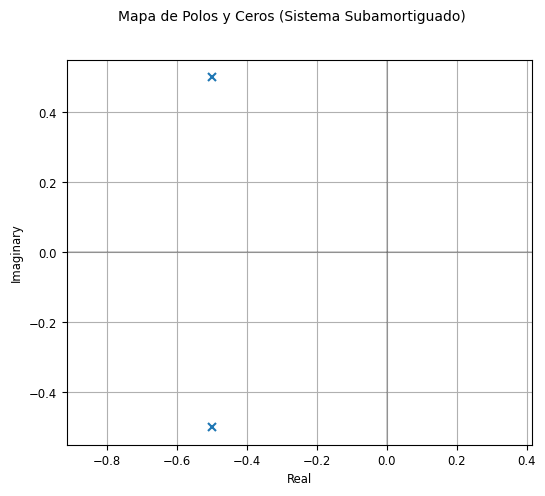

In [4]:
# --- Mapa de Polos y Ceros ---
plt.figure(figsize=(6, 5))
ct.pzmap(sistema_sub, title='Mapa de Polos y Ceros (Sistema Subamortiguado)')
plt.grid(True)
plt.show()

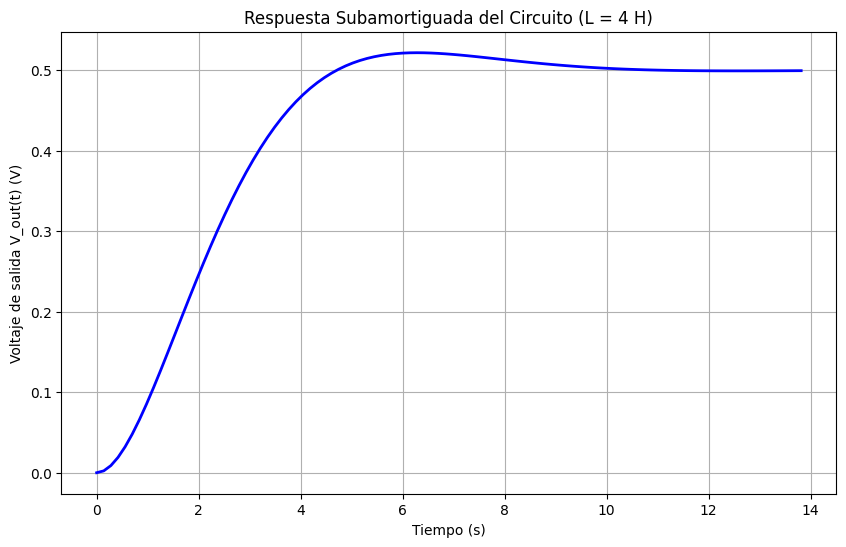

In [5]:
# --- Respuesta al escalón unitario. ---
t_sub, vout_sub = ct.step_response(sistema_sub)

# --- Grafics de la respuesta. ---
plt.figure(figsize=(10, 6))
plt.plot(t_sub, vout_sub, 'b-', linewidth=2)
plt.title('Respuesta Subamortiguada del Circuito (L = 4 H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

### Análisis para Respuesta Críticamente Amortiguada

Para el caso críticamente amortiguado, el discriminante debe ser igual a cero:

$$ (L + R_1 R_2 C)^2 - 4 \cdot (LCR_1) \cdot (R_1 + R_2) = 0 $$

Sustituimos los valores: $R_1 = 2$, $R_2 = 2$, $C = 1$

$$ (L + 2 \cdot 2 \cdot 1)^2 - 4 \cdot (L \cdot 1 \cdot 2) \cdot (2 + 2) = 0 $$
$$ (L + 4)^2 - 4 \cdot (2L) \cdot 4 = 0 $$
$$ (L + 4)^2 - 32L = 0 $$
$$ L^2 + 8L + 16 - 32L = 0 $$
$$ L^2 - 24L + 16 = 0 $$

Resolvemos la ecuación cuadrática:
$$ L = \frac{24 \pm \sqrt{(-24)^2 - 4 \cdot 1 \cdot 16}}{2 \cdot 1} $$
$$ L = \frac{24 \pm \sqrt{576 - 64}}{2} $$
$$ L = \frac{24 \pm \sqrt{512}}{2} $$
$$ L = \frac{24 \pm 16\sqrt{2}}{2} $$
$$ L = 12 \pm 8\sqrt{2} $$

Las dos soluciones son:
$$ L_1 = 12 + 8\sqrt{2} \approx 23.31 \, H $$
$$ L_2 = 12 - 8\sqrt{2} \approx 0.69 \, H $$

Usaremos $L_{critico} = 0.69 \, H$ (la solución físicamente más razonable).

In [6]:
print("=== SISTEMA CRÍTICAMENTE AMORTIGUADO ===")
L_crit = 0.69  # Henrios

num_crit = [R2]
den_crit = [L_crit*C*R1, (L_crit + R1*R2*C), (R1 + R2)]
sistema_crit = ct.tf(num_crit, den_crit)

print("Función de Transferencia:\n")
print(sistema_crit)

polos_crit = ct.poles(sistema_crit)
print("\nPolos del sistema:\n", polos_crit)
print()

=== SISTEMA CRÍTICAMENTE AMORTIGUADO ===
Función de Transferencia:

<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

            2
  ---------------------
  1.38 s^2 + 4.69 s + 4

Polos del sistema:
 [-1.69927536+0.10494745j -1.69927536-0.10494745j]



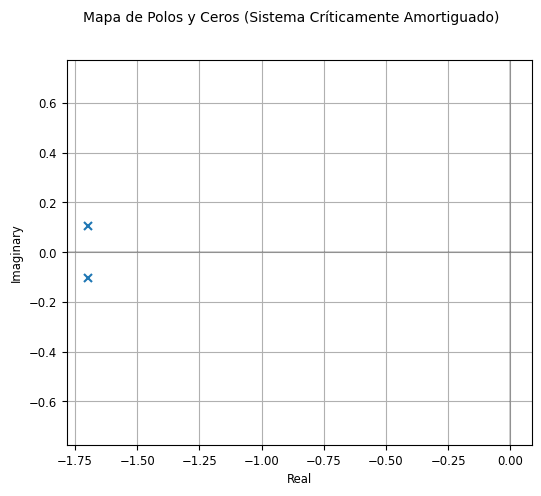

In [7]:
# --- Mapa de pplos y ceros - Críticamente Amortiguado ---
plt.figure(figsize=(6, 5))
ct.pzmap(sistema_crit, title='Mapa de Polos y Ceros (Sistema Críticamente Amortiguado)')
plt.grid(True)
plt.show()

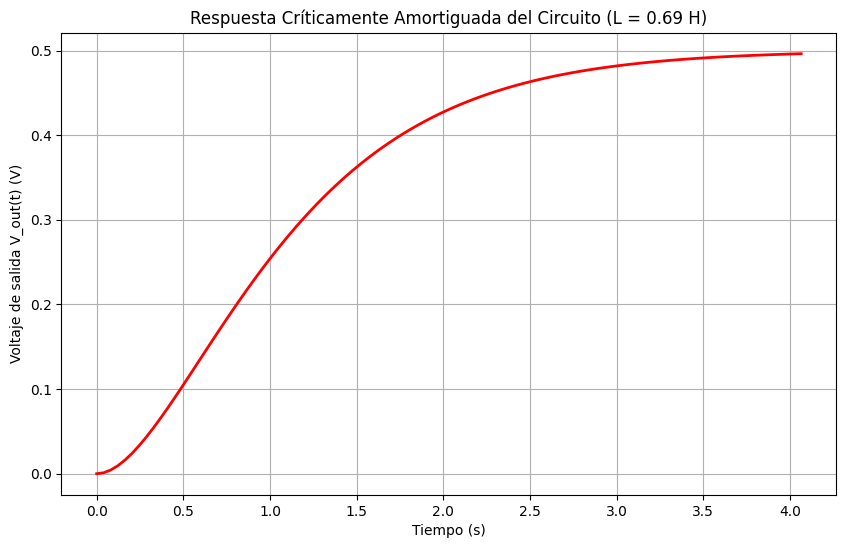

In [8]:
# --- Respuesta al escalón - Críticamente Amortiguado ---
t_crit, vout_crit = ct.step_response(sistema_crit)

plt.figure(figsize=(10, 6))
plt.plot(t_crit, vout_crit, 'r-', linewidth=2)
plt.title('Respuesta Críticamente Amortiguada del Circuito (L = 0.69 H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

### Análisis para Respuesta Sobreamortiguada

Para el caso sobreamortiguado, elegimos $L = 0.1 \, H$ (menor que el valor crítico). Verificamos analíticamente:

El polinomio característico es:
$$ s^2(LCR_1) + s(L + R_1R_2C) + (R_1 + R_2) = 0 $$
$$ s^2(0.1 \cdot 1 \cdot 2) + s(0.1 + 2 \cdot 2 \cdot 1) + (2 + 2) = 0 $$
$$ 0.2s^2 + 4.1s + 4 = 0 $$

El discriminante:
$$ \Delta = (4.1)^2 - 4 \cdot 0.2 \cdot 4 = 16.81 - 3.2 = 13.61 > 0 $$

Las raíces:
$$ s = \frac{-4.1 \pm \sqrt{13.61}}{2 \cdot 0.2} = \frac{-4.1 \pm 3.69}{0.4} $$
$$ s_1 = \frac{-4.1 - 3.69}{0.4} = -19.475 $$
$$ s_2 = \frac{-4.1 + 3.69}{0.4} = -1.025 $$

Ambas raíces son reales, distintas y negativas, confirmando que es un sistema sobreamortiguado.

In [9]:
print("=== SISTEMA SOBREAMORTIGUADO ===")
L_sobre = 0.1  # Henrios

num_sobre = [R2]
den_sobre = [L_sobre*C*R1, (L_sobre + R1*R2*C), (R1 + R2)]
sistema_sobre = ct.tf(num_sobre, den_sobre)

print("Función de Transferencia:\n")
print(sistema_sobre)

polos_sobre = ct.poles(sistema_sobre)
print("\nPolos del sistema:\n", polos_sobre)
print()

=== SISTEMA SOBREAMORTIGUADO ===
Función de Transferencia:

<TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           2
  -------------------
  0.2 s^2 + 4.1 s + 4

Polos del sistema:
 [-19.47293337+0.j  -1.02706663+0.j]



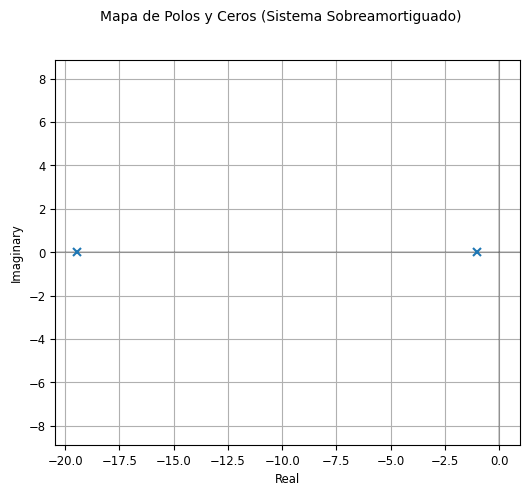

In [10]:
# --- Mapa de pplos y Ceros - Sobreamortiguado ---
plt.figure(figsize=(6, 5))
ct.pzmap(sistema_sobre, title='Mapa de Polos y Ceros (Sistema Sobreamortiguado)')
plt.grid(True)
plt.show()

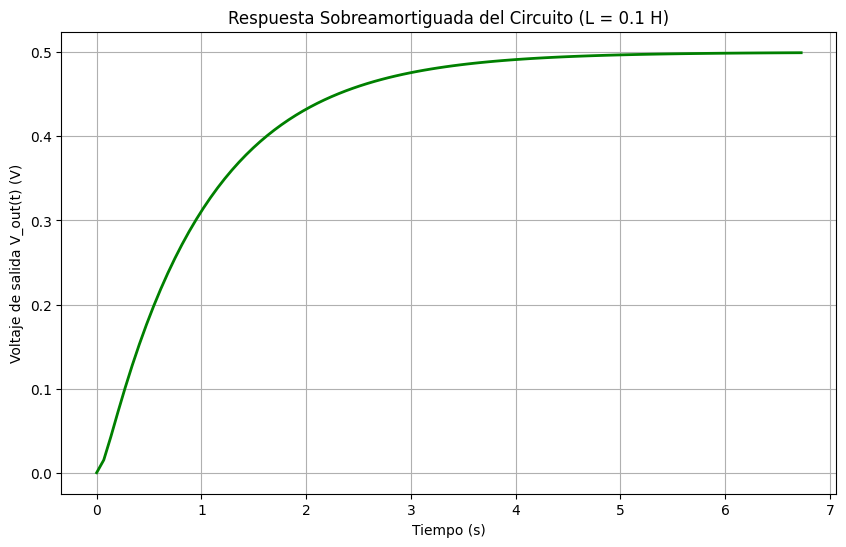

In [11]:
# --- Respuesta al escalón - Sobreamortiguado ---
t_sobre, vout_sobre = ct.step_response(sistema_sobre)

plt.figure(figsize=(10, 6))
plt.plot(t_sobre, vout_sobre, 'g-', linewidth=2)
plt.title('Respuesta Sobreamortiguada del Circuito (L = 0.1 H)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje de salida V_out(t) (V)')
plt.grid(True)
plt.show()

#### Comparación Final de las Tres Respuestas

=== COMPARACIÓN FINAL ===


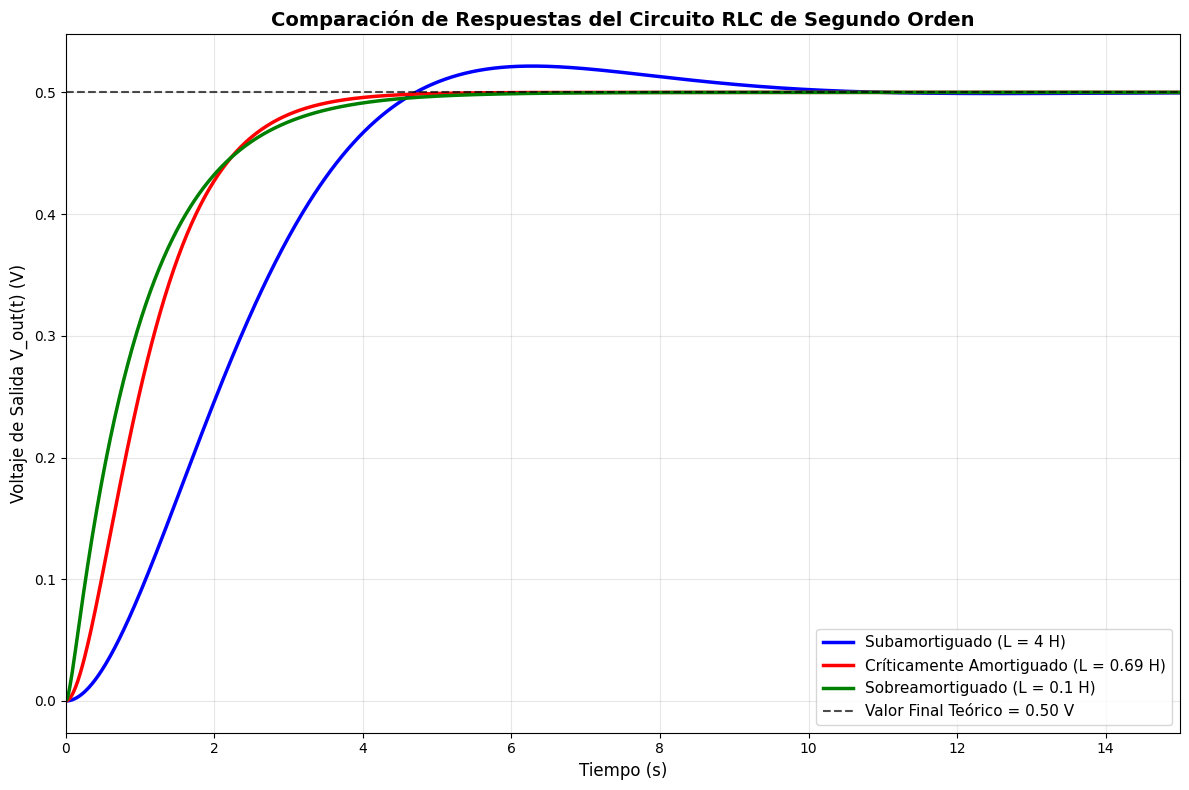

In [12]:
# --- COMPARACIÓN FINAL DE LAS TRES RESPUESTAS ---
print("=== COMPARACIÓN FINAL ===")

t_final = 15
t_compare = np.linspace(0, t_final, 1000)

t_sub, y_sub = ct.step_response(sistema_sub, t_compare)
t_crit, y_crit = ct.step_response(sistema_crit, t_compare)
t_sobre, y_sobre = ct.step_response(sistema_sobre, t_compare)

plt.figure(figsize=(12, 8))

plt.plot(t_sub, y_sub, 'b-', linewidth=2.5, label='Subamortiguado (L = 4 H)')
plt.plot(t_crit, y_crit, 'r-', linewidth=2.5, label='Críticamente Amortiguado (L = 0.69 H)')
plt.plot(t_sobre, y_sobre, 'g-', linewidth=2.5, label='Sobreamortiguado (L = 0.1 H)')

plt.title('Comparación de Respuestas del Circuito RLC de Segundo Orden', fontsize=14, fontweight='bold')
plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Voltaje de Salida V_out(t) (V)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='lower right')
plt.xlim(0, t_final)

valor_final_teorico = R2 / (R1 + R2)
plt.axhline(y=valor_final_teorico, color='k', linestyle='--', alpha=0.7, 
           label=f'Valor Final Teórico = {valor_final_teorico:.2f} V')
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [13]:
# --- RESUMEN DE RESULTADOS ---
print("=== RESUMEN DE RESULTADOS ===")
print(f"Parámetros comunes: R1 = {R1} Ω, R2 = {R2} Ω, C = {C} F")
print("\nAnálisis de Polos:")
print(f"\nSubamortiguado (L = {L_sub} H): {polos_sub}")
print(f"\nCríticamente amortiguado (L = {L_crit} H): {polos_crit}")
print(f"\nSobreamortiguado (L = {L_sobre} H): {polos_sobre}")

print(f"\nValor final teórico para entrada escalón unitario: {valor_final_teorico:.2f} V")

=== RESUMEN DE RESULTADOS ===
Parámetros comunes: R1 = 2 Ω, R2 = 2 Ω, C = 1 F

Análisis de Polos:

Subamortiguado (L = 4 H): [-0.5+0.5j -0.5-0.5j]

Críticamente amortiguado (L = 0.69 H): [-1.69927536+0.10494745j -1.69927536-0.10494745j]

Sobreamortiguado (L = 0.1 H): [-19.47293337+0.j  -1.02706663+0.j]

Valor final teórico para entrada escalón unitario: 0.50 V


### Conclusiones

A través de esta práctica hemos podido comprobar experimentalmente cómo los parámetros físicos de un circuito RLC determinan conpletamente su comportamiento dinámico, particularmente a través del análisis de su función de transferencia y la ubicación de sus polos en el plano complejo.

- **Subamortiguado (L = 4 H)**: Sistema oscilatorio con sobrepicos, debido a polos complejos conjugados, ideal donde se toleran oscilaciones.

- **Críticamente amortiguado (L = 0.69 H)**: Respuesta más rápida sin oscilaciones, con polos reales iguales, ideal para respuestas rápidas y estables.

- **Sobreamortiguado (L = 0.1 H)**: Respuesta lenta sin oscilaciones, con polos reales distintos, util cuando se evitan sobrepicos a costa de velocidad.

Todos los casos alcanzan el mismo valor final (0.5 V), demostrando que los parámetros afectan solo la respuesta transitoria, no el estado estable, esta práctica nos muestra la importancia de seleccionar adecuadamente los componentes en el diseño de sistemas de control.